## Background

We have selected a dataset that is about wine tasting on Kaggle. In this section, we will prepare some ground work and cleaning up the data first.

In [1]:
#importing everything we need!

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

In [2]:
#A glance of the raw CSV file

df = pd.read_csv('winemag-data-130k-v2.csv')

In [3]:
df

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [5]:
df.isnull().any()

id                       False
country                   True
description              False
designation               True
points                   False
price                     True
province                  True
region_1                  True
region_2                  True
taster_name               True
taster_twitter_handle     True
title                    False
variety                   True
winery                   False
dtype: bool

In [6]:
print('No. of Missing Values for country: ',df.country.isna().sum())
print('No. of Missing Values for designation: ', df.designation.isna().sum())
print('No. of Missing Values for price: ',df.province.isna().sum())
print('No. of Missing Values for region_1: ',df.region_1.isna().sum())
print('No. of Missing Values for region_2: ', df.region_2 .isna().sum())
print('No. of Missing Values for variety: ',df.variety.isna().sum())
print('No. of Missing Values for taster_name: ',df.taster_name.isna().sum())

No. of Missing Values for country:  63
No. of Missing Values for designation:  37465
No. of Missing Values for price:  63
No. of Missing Values for region_1:  21247
No. of Missing Values for region_2:  79460
No. of Missing Values for variety:  1
No. of Missing Values for taster_name:  26244


You can see we have quite a low of missing values mainly in desgination, regions and taster_name.

In [7]:
df = df.set_index('id')
df.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
id,,,,,,,,,,,,,
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


<AxesSubplot:ylabel='id'>

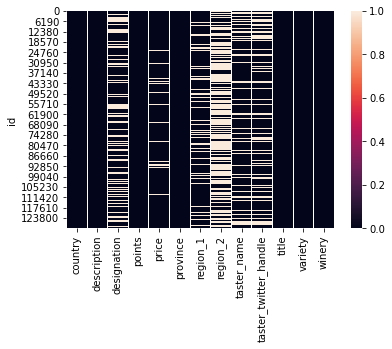

In [8]:
sns.heatmap(df.isnull())

In [9]:
#Identify the type of variables in this dataset :

#country - where is the wine from
#description - descriptive reviews on the wine by tasters
#designation - special qualities of a wine. Sometimes the wine is of such a high standard as to be designated by the winemaker as a special selection or private reserve.
#points - the higher the point is, the better the wine is 
#price - the price of the wine in USD
#province and region - where the wine is from 
#taster_name - the name of the reviewer
#title - name of the wine on the bottle 
#variety - grape variety 
#winery - name of the production of the wine

In [10]:
df.drop(columns = ['taster_twitter_handle','region_1','region_2'],axis=1,inplace=True)
df.dropna(inplace = True)
df.head()

,country,description,designation,points,price,province,taster_name,title,variety,winery
id,,,,,,,,,,
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo


We removed the entire columns of 'taster_twitter_handle', 'region_1' , 'region_2', 
along with all the missing values in the dataset is mainly because of two reasons. First of all, there is a lot of values missing in all these columns and it will affect the accuracy of the statistics. Secondly, these columns won't contribute much to our hypothesis to find out the best wine option. 

## Understand the meaning of the points
The points on average for wine are fairly high (~80up). So what score can be considered as a high or low among different wines?
To understand the points a bit better, we will explore the distrubution of points.

In [11]:
df.describe()

,points,price
count,69919.000000,69919.000000
mean,88.842589,36.866817
std,2.970558,36.830169
min,80.000000,4.000000
25%,87.000000,18.000000
50%,89.000000,28.000000
75%,91.000000,45.000000
max,100.000000,2013.000000


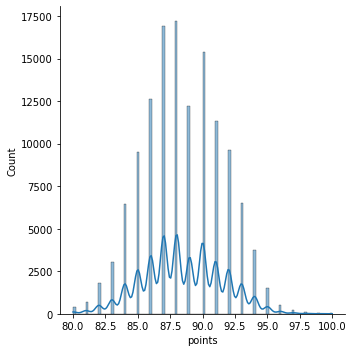

In [6]:
sns.displot(data=df, x='points', kde=True)

So based on the above analyses, we can see:
- The mean is 88.8 points
- The upper quartile is 91 points

If a bottle of wine scores <88.8 points, it can be considered as low quality.

If a bottle of wine scores 88.8 to 90 points, it can be considered as mediocre.

If a bottle of wine scores >=91 points, it can be considered as decent quality.

## Which country is the best?
Out of so many countries in the list, which country has the highest points?

In [13]:
#removing the countries that have too few reviews. Only the countries with at least 100 reviews are left.

c_count = pd.DataFrame(df['country'].value_counts())
c_count.reset_index(inplace=True)
c_count.columns = ['country','counts']
c_count.drop(c_count[c_count.counts < 100].index,inplace=True)
print(c_count)

         country  counts
0             US   26065
1         France   11655
2          Italy    7070
3          Spain    5202
4       Portugal    4376
5          Chile    3737
6      Argentina    2860
7        Austria    2364
8        Germany    1936
9      Australia    1450
10  South Africa     695
11   New Zealand     616
12        Israel     414
13        Greece     315
14        Canada     175
15       Hungary     122
16       Romania     114


In [14]:
df_avg = df.groupby(['country']).mean()
combine_avg = c_count.merge(df_avg, on='country', how='left').round(1)
combine_avg.drop(['counts','price'], axis=1, inplace=True)
combine_avg.sort_values(by = ['points'], ascending=False, inplace=True)
combine_avg

,country,points
7,Austria,90.5
8,Germany,90.0
15,Hungary,89.3
14,Canada,89.3
0,US,89.3
9,Australia,89.2
1,France,89.1
2,Italy,89.1
11,New Zealand,89.0
12,Israel,88.6


Text(0, 0.5, 'Average Points')

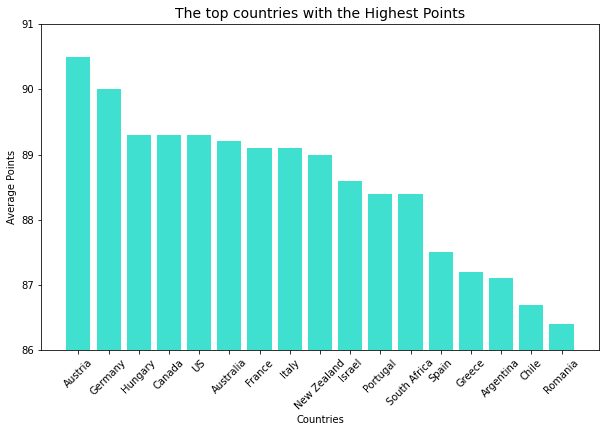

In [15]:
plt.figure(figsize=(10,6))
plt.bar(range(len(combine_avg)), combine_avg['points'], color='turquoise')
plt.xticks(range(len(combine_avg)), combine_avg['country'], rotation = 45)
plt.axis([None, None, 86, 91])
plt.title('The top countries with the Highest Points',fontsize=14)
plt.xlabel('Countries')
plt.ylabel('Average Points')

Based on the stats above, Austria is considered having the best wine across the globe, followed by Germany, hungary,Canada, Us and Australia. 
Spain, Greece, Argentina, Chile and Romania are not known for producing good wines. 

## Which the varieties has the highest points?
After understanding the countries, we want to know which varieties are better in term of quality.

In [8]:
#removing the varieties that have very little reviews. Only the varieties with at least 1000 reviews are selected.

v_count = pd.DataFrame(df['variety'].value_counts())
v_count.reset_index(inplace=True)
v_count.columns = ['variety','counts']
v_count.drop(v_count[v_count.counts < 1000].index,inplace=True)
print(v_count)

                       variety  counts
0                   Pinot Noir   13272
1                   Chardonnay   11753
2           Cabernet Sauvignon    9472
3                    Red Blend    8946
4     Bordeaux-style Red Blend    6915
5                     Riesling    5189
6              Sauvignon Blanc    4967
7                        Syrah    4142
8                         Rosé    3564
9                       Merlot    3102
10                    Nebbiolo    2804
11                   Zinfandel    2714
12                  Sangiovese    2707
13                      Malbec    2652
14              Portuguese Red    2466
15                 White Blend    2360
16             Sparkling Blend    2153
17                 Tempranillo    1810
18       Rhône-style Red Blend    1471
19                  Pinot Gris    1455
20             Champagne Blend    1396
21              Cabernet Franc    1353
22            Grüner Veltliner    1345
23            Portuguese White    1159
24  Bordeaux-style White 

In [17]:
#Combining two dataframe together
v_avg = df.groupby(['variety']).mean()
combine_v_avg = v_count.merge(v_avg, on='variety', how='left').round(1)
combine_v_avg

,variety,counts,points,price
0,Pinot Noir,7449,90.0,50.3
1,Chardonnay,5672,89.0,39.2
2,Red Blend,5622,88.6,36.4
3,Riesling,4042,89.9,35.4
4,Cabernet Sauvignon,3959,88.8,48.6
5,Bordeaux-style Red Blend,2428,89.1,42.7
6,Syrah,2356,90.0,43.3
7,Sauvignon Blanc,2323,87.9,22.1
8,Rosé,2128,87.0,19.1
9,Portuguese Red,2064,88.9,24.7


In [18]:
#Remove the irrelevant information --- price & counts
combine_v_avg.drop(['counts','price'], axis=1, inplace=True)
combine_v_avg.sort_values(by = ['points'], ascending=False)
print(combine_v_avg)

                     variety  points
0                 Pinot Noir    90.0
1                 Chardonnay    89.0
2                  Red Blend    88.6
3                   Riesling    89.9
4         Cabernet Sauvignon    88.8
5   Bordeaux-style Red Blend    89.1
6                      Syrah    90.0
7            Sauvignon Blanc    87.9
8                       Rosé    87.0
9             Portuguese Red    88.9
10                    Malbec    88.3
11           Sparkling Blend    88.0
12               White Blend    87.5
13               Tempranillo    87.8
14                  Nebbiolo    90.5
15                 Zinfandel    88.8
16                    Merlot    87.4
17           Champagne Blend    89.9
18     Rhône-style Red Blend    89.6


Based on the stats, Nebbiolo is considered as the best variety among all, where Rose is slightly scores the lowest among all. 

In [19]:
#Which type of wine has higher points?

wine_types = {"Pinot Noir":"Red",
              "Red Blend":"Red",
              "Cabernet Sauvignon":"Red",
              "Syrah":"Red",
              "Portuguese Red":"Red",
              "Malbec":"Red",
              "Tempranillo":"Red",
              "Nebbiolo":"Red",
              "Zinfandel":"Red",
              "Merlot":"Red",
              "Bordeaux-style Red Blend":"Red",
              "Rhône-style Red Blend":"Red",
              
              
              "Chardonnay":"White",
              "Riesling":"White",
              "Sauvignon Blanc":"White",
              "White Blend":"White",
              
              "Rosé":"Rosé",
              
              "Sparkling Blend":"Sparkling",
              
              "Champagne Blend":"Champagne"}
              
combine_v_avg["type"] = combine_v_avg["variety"].map(wine_types)
print(combine_v_avg)

                     variety  points       type
0                 Pinot Noir    90.0        Red
1                 Chardonnay    89.0      White
2                  Red Blend    88.6        Red
3                   Riesling    89.9      White
4         Cabernet Sauvignon    88.8        Red
5   Bordeaux-style Red Blend    89.1        Red
6                      Syrah    90.0        Red
7            Sauvignon Blanc    87.9      White
8                       Rosé    87.0       Rosé
9             Portuguese Red    88.9        Red
10                    Malbec    88.3        Red
11           Sparkling Blend    88.0  Sparkling
12               White Blend    87.5      White
13               Tempranillo    87.8        Red
14                  Nebbiolo    90.5        Red
15                 Zinfandel    88.8        Red
16                    Merlot    87.4        Red
17           Champagne Blend    89.9  Champagne
18     Rhône-style Red Blend    89.6        Red


Text(0, 0.5, 'Average Points')

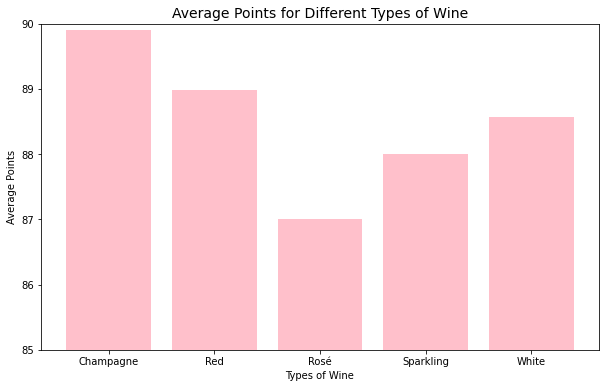

In [20]:
combine_v_avg = combine_v_avg.groupby('type').mean().reset_index()
plt.figure(figsize=(10,6))
plt.bar(range(len(combine_v_avg)), combine_v_avg['points'], color='pink')
plt.xticks(range(len(combine_v_avg)), combine_v_avg['type'])
plt.axis([None, None, 85, 90])
plt.title('Average Points for Different Types of Wine',fontsize=14)
plt.xlabel('Types of Wine')
plt.ylabel('Average Points')

We classify varieties into based on their types (red, white, sparkling, rose, champagne) and found out that Champagne is the best overall. 

## Correlation between the points and the prices
This is a myth --- is more expensive equal to better quality? 

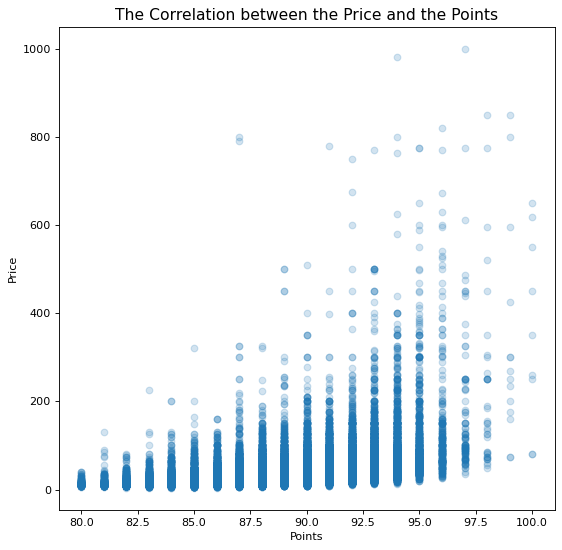

In [21]:
#Removing outliners
df2 = df.copy()
df2.drop(df[df.price > 1000].index, inplace=True)

#Creating a scatter plot
x = df2.points
y = df2.price

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x, y, alpha = 0.2)
plt.title('The Correlation between the Price and the Points',fontsize=14)
plt.xlabel('Points')
plt.ylabel('Price')
plt.show()

<AxesSubplot:xlabel='price', ylabel='points'>

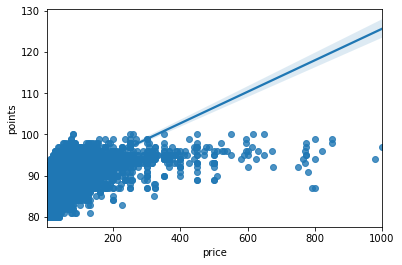

In [22]:
sns.regplot(x="price", y="points", data=df2)

We can tell that based on the scatter plot above that most of the low quality wines (<88 points) are on the cheaper side (below $200), and decent wines tend to be more expensive than low quality wines. 

## Correlation between quantity and quality
The rarer of the wine the better? We will find out!

In [23]:
#Counting the quantity for each variety

total_count = pd.DataFrame(df['variety'].value_counts())
total_count.reset_index(inplace=True)
total_count.columns = ['variety','counts']
print(total_count)

                       variety  counts
0                   Pinot Noir    7449
1                   Chardonnay    5672
2                    Red Blend    5622
3                     Riesling    4042
4           Cabernet Sauvignon    3959
..                         ...     ...
593  Chardonnay Weissburgunder       1
594                  Xinisteri       1
595               Morio Muskat       1
596                    Kadarka       1
597             Mavrokalavryta       1

[598 rows x 2 columns]


In [24]:
#Combining two dataframe together
total_avg = df.groupby(['variety']).mean()
total_a = total_count.merge(total_avg, on='variety', how='left').round(1)
total_a

,variety,counts,points,price
0,Pinot Noir,7449,90.0,50.3
1,Chardonnay,5672,89.0,39.2
2,Red Blend,5622,88.6,36.4
3,Riesling,4042,89.9,35.4
4,Cabernet Sauvignon,3959,88.8,48.6
...,...,...,...,...
593,Chardonnay Weissburgunder,1,94.0,58.0
594,Xinisteri,1,89.0,20.0
595,Morio Muskat,1,90.0,16.0
596,Kadarka,1,87.0,20.0


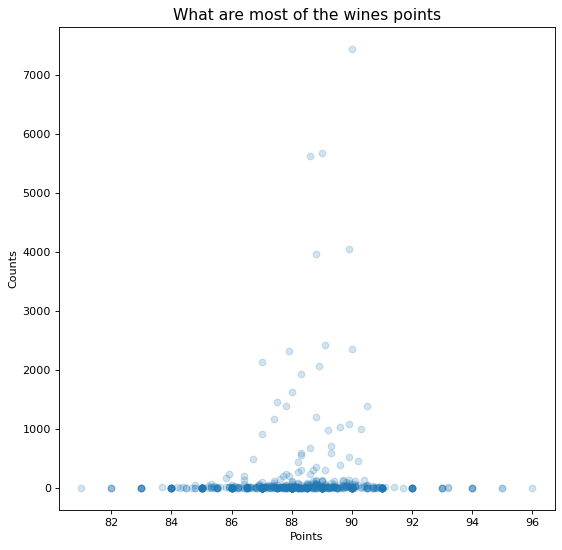

In [25]:
#Creating a scatter plot
x = total_a.points
y = total_a.counts

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x, y, alpha = 0.2)
plt.title('What are most of the wines points',fontsize=14)
plt.xlabel('Points')
plt.ylabel('Counts')
plt.show()

<AxesSubplot:xlabel='counts', ylabel='points'>

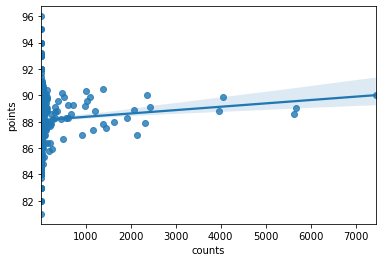

In [26]:
sns.regplot(x='counts', y='points', data=total_a)

Looks like most of the wines' point is between 86 to 90, which elaborate that only minority of the wine in the database is of decent quality.

To summarize, the majority of the wines in this databased can not be acknowledged as decent quality wines. 
Among all the countries, Austria has the best wine across the world. Romania is not known for the best place to get decent wines. 
Among all the types of wines, Champagne tend to be better quality than red, white, rose and sparkling. 
The price of the wine does justify the quality as most of the decent wines are on the expensive side. 